# Chapter 4 Introduction to Diagnostic Testing Metrics/ meterics for Model Performance:



### Many students and professionals misunderstand test precision metrics (e.g., confusing test error rates with accuracy).
- Example: Casscells et al. (1978) highlighted that most participants incorrectly interpreted the PPV of a diagnostic test with 1/1000 disease prevalence and 5% false positive rate. Correct answer: ~2%; common incorrect response: 95%.

- If a model says a person has a disease, think of it as the prediction says the person has the disease, not that the person has the disease. It sounds weird, but what it is saying think of the prediction as a metric not Truth (Ground Truth). 

- The prediction reflects a probability or classification that should be interpreted alongside the model's sensitivity, specificity, and predictive values.

### Definitions for Sensitivity, Specificity, and Related Metrics


1. **True Positive (TP):**  
   A result where the test predicts a positive outcome, and the subject actually has the condition.

2. **False Positive (FP):**  
   A result where the test predicts a positive outcome, but the subject does not have the condition.

3. **True Negative (TN):**  
   A result where the test predicts a negative outcome, and the subject does not have the condition.

4. **False Negative (FN):**  
   A result where the test predicts a negative outcome, but the subject actually has the condition.

---

5. **Sensitivity (Recall, True Positive Rate):**  
   $$
   \text{Sensitivity} = \frac{\text{TP}}{\text{TP} + \text{FN}}
   $$  
- Measures how well the model identifies true positives.
- Useful when false negatives are critical (e.g., detecting diseases, fraud).
---
6. **Specificity (True Negative Rate):**  
   $$
   \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
   $$  
- Measures the ability of a test to correctly identify negative cases.
- Measures how well the model identifies true negatives.
- Important when false positives are costly (e.g., unnecessary treatments or alarms)
---
7. **Precision (Positive Predictive Value (PPV))-book def:**  
   $$
   \text{PPV} = \frac{\text{TP}}{\text{TP} + \text{FP}}
   $$  
- Probability that a subject with a positive test result actually has the condition.
---
8. **Negative Predictive Value (NPV):**  
   $$
   \text{NPV} = \frac{\text{TN}}{\text{TN} + \text{FN}}
   $$  
- Probability that a subject with a negative test result does not have the condition.
- Rarely referred to directly in ML
---
9. **Accuracy:**  
   $$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}}
   $$  
- Measures the overall correctness of the test across all cases.
- Most common metric but can be misleading for imbalanced datasets.

---
10. **F1-Score:**  
    $$
    \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    $$  
- The harmonic mean of precision and recall, balancing false positives and false negatives.
- Balances precision and recall, commonly used in imbalanced datasets.

---
11. **Prevalence:**  
    $$
    \text{Prevalence} = \frac{\text{TP} + \text{FN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}}
    $$  
- The proportion of the population with the condition.
---
12. **False Positive Rate (FPR):**  
    $$
    \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
    $$  
- The probability of falsely identifying a negative case as positive.
- Equivalent to (1 - Specificity) a.k.a "Fallout."

---
13. **False Negative Rate (FNR):**  
    $$
    \text{FNR} = \frac{\text{FN}}{\text{TP} + \text{FN}}
    $$  
- The probability of failing to identify a positive case.
- Equivalent to (1 - Sensitivity)

---
14. **Receiver Operating Characteristic (ROC) Curve:**  
    A plot of **Sensitivity** ($y$-axis) vs. \(1 - Specificity}\) ($x$-axis), used to evaluate the performance of a diagnostic test.
- Visual tool to compare classification models.
---
15. **Area Under the Curve (AUC):**  
    The area under the ROC curve, representing the test's ability to discriminate between positive and negative cases.
- Metric for overall model performance, with values ranging from 0.5 (random guess) to 1 (perfect model).
---

#### Example Table Representation

| Disease (D)        | No Disease (C)   | Total                |
|---------------------|------------------|----------------------|
| **Test Positive (P)** | TP              | FP                   | $$n_P = TP + FP$$ |
| **Test Negative (N)** | FN              | TN                   | $$n_N = FN + TN$$ |
| **Total**           | $$n_D = TP + FN$$| $$n_C = FP + TN$$    | $$n = n_D + n_C$$ |


## Code Examples of Each Metric

#### Binary Classification Problem Simulation. 

Adjust Threshold: Experiment with different thresholds (e.g., 0.3, 0.7) and observe how metrics like sensitivity and precision change.

Analyze Trade-offs: Use the ROC curve to explain the trade-off between sensitivity and specificity.

Experiment with Class Imbalance: Modify the p parameter in np.random.choice to simulate imbalanced datasets and observe its impact.

Confusion Matrix: TP=67, FP=240, TN=561, FN=132
Sensitivity (Recall): 0.34
Specificity: 0.70
Precision (PPV): 0.22
Negative Predictive Value (NPV): 0.81
Accuracy: 0.63
F1-Score: 0.26
False Positive Rate (FPR): 0.30
False Negative Rate (FNR): 0.66


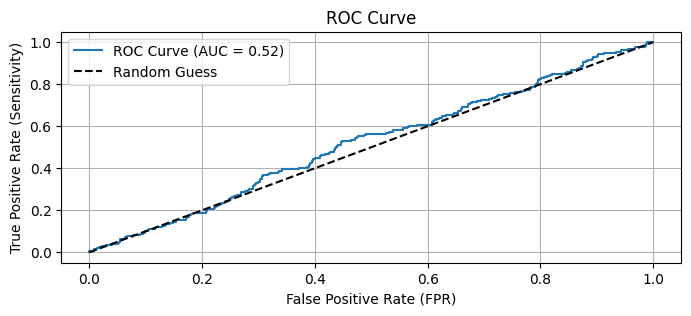

In [11]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Simulate a binary classification problem

np.random.seed(42) # For reproducibility we assign a seed to the random number generator
n_samples = 1000 # Number of samples in the dataset aka population size

true_labels = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2]) # Generates the ground truths at random 
#Defines the probabilities of selecting each class. 0 (negative class) has an 80% and 1 (positive class) has a 20%

predicted_probs = np.random.rand(n_samples)  # Random probabilities as model output
threshold = 0.7 # Sets the decision threshold for classification. If the probability is greater than 0.7, the class is 1
predicted_labels = (predicted_probs >= threshold).astype(int)


# Step 2: Calculate confusion matrix components
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Step 3: Calculate metrics
sensitivity = tp / (tp + fn)  # Recall / True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
precision = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value
accuracy = (tp + tn) / (tp + fp + tn + fn)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (tp + fn)  # False Negative Rate

# Print metrics
print(f"Confusion Matrix: TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision (PPV): {precision:.2f}")
print(f"Negative Predictive Value (NPV): {npv:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")

# Step 4: Visualize ROC Curve and Calculate AUC
fpr_values, tpr_values, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr_values, tpr_values)

plt.figure(figsize=(8, 3))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


### **Confusion Matrix Analysis**
- **True Positives (TP):** 67 — The model correctly identified 67 positive cases.
- **False Positives (FP):** 240 — The model incorrectly predicted 240 negative cases as positive.
- **True Negatives (TN):** 561 — The model correctly identified 561 negative cases.
- **False Negatives (FN):** 132 — The model missed 132 positive cases.

---

### **Key Metrics and Their Implications**

1. **Sensitivity (Recall):**
   $$
   \text{Sensitivity} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{67}{67 + 132} \approx 0.34
   $$
   - The model identifies only **34% of the actual positive cases**.
   - **Implication:** The model has poor performance in catching positive cases. The high false negatives (\(FN = 132\)) significantly lower sensitivity, which can be problematic in applications like disease detection.

2. **Specificity:**
   $$
   \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} = \frac{561}{561 + 240} \approx 0.70
   $$
   - The model correctly identifies **70% of the actual negative cases**.
   - **Implication:** While not perfect, the model is reasonably good at avoiding false positives (\(FP = 240\)).

3. **Precision (Positive Predictive Value, PPV):**
   $$
   \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{67}{67 + 240} \approx 0.22
   $$
   - Only **22% of the predicted positive cases** are actually correct.
   - **Implication:** The model has low confidence in its positive predictions due to a large number of false positives (\(FP = 240\)).

4. **Negative Predictive Value (NPV):**
   $$
   \text{NPV} = \frac{\text{TN}}{\text{TN} + \text{FN}} = \frac{561}{561 + 132} \approx 0.81
   $$
   - **81% of predicted negative cases** are correct.
   - **Implication:** The model performs well at identifying true negatives.

5. **Accuracy:**
   $$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}} = \frac{67 + 561}{67 + 240 + 561 + 132} \approx 0.63
   $$
   - The model correctly predicts **63% of the total cases**.
   - **Implication:** Accuracy is moderate but can be misleading in imbalanced datasets.

6. **F1-Score:**
   $$
   \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \cdot \frac{0.22 \cdot 0.34}{0.22 + 0.34} \approx 0.26
   $$
   - The harmonic mean of precision and recall is **26%**.
   - **Implication:** The model struggles to balance precision and recall, especially in scenarios with imbalanced classes.

7. **False Positive Rate (FPR):**
   $$
   \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{240}{240 + 561} \approx 0.30
   $$
   - **Implication:** The model incorrectly predicts **30% of negative cases** as positive, which could lead to unnecessary interventions in some applications.

8. **False Negative Rate (FNR):**
   $$
   \text{FNR} = \frac{\text{FN}}{\text{TP} + \text{FN}} = \frac{132}{67 + 132} \approx 0.66
   $$
   - **Implication:** The model misses **66% of actual positive cases**, which is problematic in critical applications like disease detection.

### **Summary of Metric Use Cases**
| Metric         | Best Use Case                                       | Helps Ensure                                       |
|----------------|----------------------------------------------------|--------------------------------------------------|
| **Accuracy**   | Balanced datasets                                   | Overall correctness                              |
| **Precision**  | Minimize false positives                            | High confidence in positive predictions          |
| **Recall**     | Minimize false negatives                            | High sensitivity for positive cases              |
| **F1-Score**   | Imbalanced datasets or trade-off between FP/FN      | Balanced performance between precision & recall  |
| **Specificity**| Minimize false positives                            | Reliable negative predictions                    |
| **AUC-ROC**    | Model comparison across thresholds                  | General performance evaluation                   |


